In [566]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Creamos una copia del dataset para comenzar a trabajar.

In [567]:
ds_hotel=pd.read_csv('./hotels_train.csv')
ds_trabajo = ds_hotel.copy()

Visualizamos la cantidad de columnas y filas.

In [568]:
ds_trabajo.shape

(61913, 32)

In [569]:
ds_trabajo.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,9.0,NaN,0,Transient,115.5,0,1,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,NaN,NaN,0,Transient,42.0,1,0,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,9.0,NaN,0,Transient,229.0,0,2,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,154.0,NaN,0,Transient,75.0,0,0,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,20.0,NaN,0,Transient-Party,75.0,0,1,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0


In [570]:
ds_trabajo.tail()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
61908,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,240.0,NaN,0,Transient,48.00,0,1,2017-01-23,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1
61909,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,NaN,NaN,0,Transient,149.00,0,0,2016-09-03,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0
61910,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,NaN,153.0,0,Transient,95.00,0,0,2017-05-11,76fb0e83-59df-43ee-9c33-aec51030ed45,0
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,96.0,NaN,0,Transient,36.05,0,0,2015-07-08,01906859-1094-4e37-b13e-b015b594d159,1
61912,City Hotel,57,2016,April,17,17,2,5,2,0.0,...,9.0,NaN,0,Transient,143.29,0,0,2016-04-09,7137e599-4442-41fb-b147-4aba9f344e38,1


Consultamos la cantidad de celdas nulas. Para ello separamos las columnas del ds en dos mitades para poder observarlas.

In [571]:
ds_trabajo.iloc[:, :16].isna().sum()

hotel                          0
lead_time                      0
arrival_date_year              0
arrival_date_month             0
arrival_date_week_number       0
arrival_date_day_of_month      0
stays_in_weekend_nights        0
stays_in_week_nights           0
adults                         0
children                       4
babies                         0
meal                           0
country                      221
market_segment                 0
distribution_channel           0
is_repeated_guest              0
dtype: int64

In [572]:
ds_trabajo.iloc[:, 16:].isna().sum()

previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status_date               0
id                                    0
is_canceled                           0
dtype: int64

Podemos observar que las columnas `agent`, `country` y `company` tienen datos nulos. En particular `company` tiene casi el 95% de sus celdas nulas. Creemos que siendo tantos valores nulos no tiene mucho sentido imputarlos, por lo tanto vamos a eliminar esta columna. En cuanto a las otras dos, puede que sea correcto imputarlas.

In [573]:
ds_trabajo = ds_trabajo.drop('company', axis=1)

Listamos las columnas y podemos observar que aquellas relacionadas a la fecha de llegada (`arrival_date_year`, `arrival_date_month`, `arrival_date_day_of_month`) pueden ser unificadas en una única columna que represente la fecha de llegada, como la concatenación de estos valores. Inclusive, con esto en cuenta, es posible obviar la columna `arrival_date_number_of_week`, ya que puede ser calculada a partir de esta nueva columna.
Unificamos entonces las tres columnas relacionadas a la fecha de llegada en una única columna

In [574]:
import calendar
ds_trabajo['arrival_date_month'] = ds_trabajo['arrival_date_month'].apply(lambda x: list(calendar.month_name).index(x))
ds_trabajo['arrival_date'] = pd.to_datetime(ds_trabajo['arrival_date_year'].astype(str) + '-' + ds_trabajo['arrival_date_month'].astype(str) + '-' + ds_trabajo['arrival_date_day_of_month'].astype(str)) 
ds_trabajo['arrival_date']

0       2016-09-05
1       2015-10-31
2       2016-10-13
3       2016-12-12
4       2017-03-19
           ...    
61908   2017-01-27
61909   2016-09-02
61910   2017-05-08
61911   2015-10-10
61912   2016-04-17
Name: arrival_date, Length: 61913, dtype: datetime64[ns]

Borramos las tres columnas que quedaron unificadas

In [575]:
ds_trabajo = ds_trabajo.drop('arrival_date_year', axis=1)
ds_trabajo = ds_trabajo.drop('arrival_date_month', axis=1)
ds_trabajo = ds_trabajo.drop('arrival_date_day_of_month', axis=1)
ds_trabajo = ds_trabajo.drop('arrival_date_week_number', axis=1)

ds_trabajo.columns


Index(['hotel', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date', 'id', 'is_canceled', 'arrival_date'],
      dtype='object')

In [576]:
ds_trabajo.iloc[:, :16].dtypes

hotel                              object
lead_time                           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
dtype: object

En primer lugar, vimos que el paper indica que la variable `lead_time` está especificada en días. Creemos que trabajarlo en meses facilitará la interpretación de los datos, por este motivo vamos trabajarla en esta unidad. 

In [577]:
ds_trabajo['lead_time'] = ds_trabajo['lead_time'] / 30

Pasamos la variable `children` a `int64`, porque se trata de una cantidad entera, no tiene sentido representar un niño en formato flotante. Por otro lado, vimos que esta variable tiene sólo 4 valores nulos, por lo tanto nos parece correcto imputarlos reeplazandolos por 0. 

In [578]:
ds_trabajo['children'] = ds_trabajo['children'].fillna(0).astype(np.int64)
ds_trabajo['children'].dtype

dtype('int64')

In [579]:
ds_trabajo.iloc[:, 16:].dtypes

booking_changes                         int64
deposit_type                           object
agent                                 float64
days_in_waiting_list                    int64
customer_type                          object
adr                                   float64
required_car_parking_spaces             int64
total_of_special_requests               int64
reservation_status_date                object
id                                     object
is_canceled                             int64
arrival_date                   datetime64[ns]
dtype: object

Vamos a castear `agent` a `object`, no tiene sentido manejarla como `float` ya que el mismo paper la trata como un id categórico. Por el momento, conservamos los valores nulos para luego analizar cómo los imputamos.

In [580]:
ds_trabajo['agent'] = pd.to_numeric(ds_trabajo['agent'], errors='coerce').astype('Int64')
ds_trabajo['agent'] = ds_trabajo['agent'].astype('object')
ds_trabajo['agent'].dtype

dtype('O')

Vamos a trabajar las fechas con el tipo `datetime64[ns]`. Esto es porque nos interesa manejarlas como variables cuantitativas para poder ser ordenadas y matemáticamente manipuladas para calcular intervalos de tiempo, por ejemplo.

In [581]:
ds_trabajo['reservation_status_date'] = pd.to_datetime(ds_trabajo['reservation_status_date'])
ds_trabajo['reservation_status_date'].dtype

dtype('<M8[ns]')

Por otro lado, vamos a pasar todas aquellas variables categóricas booleanas a tipo `object`. Esto es porque se trata de una variable cualitativa la cual tiene como posibles valores `0` y `1`.

In [582]:
ds_trabajo['is_canceled'] = ds_trabajo['is_canceled'].astype('object')
ds_trabajo['is_repeated_guest'] = ds_trabajo['is_repeated_guest'].astype('object')


Por último, vamos a eliminar la columna `id` ya que no nos aporta ningún valor en nuestro problema.

In [583]:
ds_trabajo = ds_trabajo.drop('id', axis=1)

Calculamos las medidas de resumen para aquellas variables cuantitativas

In [584]:
ds_trabajo.describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000
mean,3.741606,0.924135,2.510054,1.862791,0.104889,0.007155,0.114790,0.115420,0.195952,2.638977,102.383773,0.049957,0.523703
std,3.690598,0.993101,1.884926,0.589066,0.402835,0.092158,0.993723,1.396359,0.610519,18.619092,47.757640,0.221023,0.775412
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.766667,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,2.600000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,5.733333,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,20.966667,16.000000,40.000000,55.000000,10.000000,9.000000,26.000000,70.000000,17.000000,391.000000,510.000000,8.000000,5.000000


Vemos la frecuencia de cada variable cualitativa. Vamos a hacer el proceso separando las columnas en 5 subsets debido a la cantidad de columnas y de categorías distintas para cada una.

In [585]:
ds_cualitativas = ds_trabajo.select_dtypes(include=['object'])
ds_cualitativas_subset = ds_cualitativas.iloc[:, :3]
# recorre las columnas y muestra las frecuencias de las variables cualitativas
for col in ds_cualitativas_subset.columns:
        print(f'Frecuencia de valores en {col}:')
        print(ds_trabajo[col].value_counts())
        print()


Frecuencia de valores en hotel:
City Hotel      42129
Resort Hotel    19784
Name: hotel, dtype: int64

Frecuencia de valores en meal:
BB           47837
HB            7452
SC            5556
Undefined      591
FB             477
Name: meal, dtype: int64

Frecuencia de valores en country:
PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
       ...  
HND        1
FJI        1
LIE        1
ATA        1
RWA        1
Name: country, Length: 149, dtype: int64



Observación: parece haber varias categorías de `country` con frecuencias bajas. Pienso en que se puede definir un cierto umbral que nos parezca de frecuencia baja y englobar aquellas categorías que estén por debajo del umbral en única frecuencia `other`. Por ejemplo, si definimos el umbral de 25, cubre 574 filas:

In [586]:
freq_countries = ds_trabajo['country'].value_counts()
freq_countries_low = freq_countries[freq_countries < 215]
print("Cantidad total de registros que tienen una frecuencia menor a 25 en la columna 'country':", sum(freq_countries_low))
freq_countries_low

Cantidad total de registros que tienen una frecuencia menor a 25 en la columna 'country': 2966


AGO    200
DNK    197
FIN    191
LUX    150
MAR    135
      ... 
HND      1
FJI      1
LIE      1
ATA      1
RWA      1
Name: country, Length: 127, dtype: int64

Vamos a considerar que aquellas categorías que cubran menos del 5% del total de registros pueden ser englobadas en una categoría particular que nombraremos `others`. De esta forma, estamos reduciendo nuestra cantidad de categorías de las variable `country` de 149 a 23. 

In [587]:
ds_trabajo['country'] = ds_trabajo['country'].replace(freq_countries_low.index, 'others')
ds_trabajo['country'].value_counts()

PRT       27950
GBR        5733
FRA        4809
ESP        4210
DEU        3312
others     2966
ITA        1911
IRL        1617
BRA        1152
BEL        1124
USA        1021
NLD         982
CHE         847
CN          597
AUT         581
CHN         545
SWE         481
POL         430
RUS         337
ISR         322
NOR         302
ROU         246
AUS         217
Name: country, dtype: int64

In [588]:
ds_cualitativas = ds_trabajo.select_dtypes(include=['object'])
ds_cualitativas_subset = ds_cualitativas.iloc[:, 3:5]
# recorre las columnas y muestra las frecuencias de las variables cualitativas
for col in ds_cualitativas_subset.columns:
        print(f'Frecuencia de valores en {col}:')
        print(ds_trabajo[col].value_counts())
        print()

Frecuencia de valores en market_segment:
Online TA        29269
Offline TA/TO    12384
Groups           11545
Direct            5757
Corporate         2484
Complementary      359
Aviation           113
Undefined            2
Name: market_segment, dtype: int64

Frecuencia de valores en distribution_channel:
TA/TO        51849
Direct        6799
Corporate     3172
GDS             89
Undefined        4
Name: distribution_channel, dtype: int64



In [589]:
ds_cualitativas = ds_trabajo.select_dtypes(include=['object'])
ds_cualitativas_subset = ds_cualitativas.iloc[:, 5:7]
# recorre las columnas y muestra las frecuencias de las variables cualitativas
for col in ds_cualitativas_subset.columns:
        print(f'Frecuencia de valores en {col}:')
        print(ds_trabajo[col].value_counts())
        print()

Frecuencia de valores en is_repeated_guest:
0    60180
1     1733
Name: is_repeated_guest, dtype: int64

Frecuencia de valores en reserved_room_type:
A    45134
D     9585
E     3249
F     1451
G     1090
B      580
C      482
H      334
P        7
L        1
Name: reserved_room_type, dtype: int64



In [590]:
ds_cualitativas = ds_trabajo.select_dtypes(include=['object'])
ds_cualitativas_subset = ds_cualitativas.iloc[:, 7:9]
# recorre las columnas y muestra las frecuencias de las variables cualitativas
for col in ds_cualitativas_subset.columns:
        print(f'Frecuencia de valores en {col}:')
        print(ds_trabajo[col].value_counts())
        print()

Frecuencia de valores en assigned_room_type:
A    40007
D    12190
E     3779
F     1821
G     1277
C     1127
B     1056
H      384
I      145
K      119
P        7
L        1
Name: assigned_room_type, dtype: int64

Frecuencia de valores en deposit_type:
No Deposit    51685
Non Refund    10150
Refundable       78
Name: deposit_type, dtype: int64



In [591]:
ds_cualitativas = ds_trabajo.select_dtypes(include=['object'])
ds_cualitativas_subset = ds_cualitativas.iloc[:, 9:12]
# recorre las columnas y muestra las frecuencias de las variables cualitativas
for col in ds_cualitativas_subset.columns:
        print(f'Frecuencia de valores en {col}:')
        print(ds_trabajo[col].value_counts())
        print()

Frecuencia de valores en agent:
9      17004
240     7386
1       4424
14      1700
6       1639
       ...  
420        1
352        1
450        1
283        1
25         1
Name: agent, Length: 296, dtype: int64

Frecuencia de valores en customer_type:
Transient          47449
Transient-Party    12168
Contract            2033
Group                263
Name: customer_type, dtype: int64

Frecuencia de valores en is_canceled:
0    30972
1    30941
Name: is_canceled, dtype: int64



In [592]:
ds_trabajo['agent'].isna().sum()

7890

Por otro lado, vemos que `agent` tiene una importante cantidad de categorías y también parece tener una cantidad frecuencias bajas que podríamos unificar en una única categoría de `other`. Con respecto a la cantidad de nulos, vemos que representa casi un 13% del total de registros, y dado que nos parece que `agent` es una columna relevante para la predicción de la variable `is_canceled`, no queremos descartarla. Con este enfoque, estamos pensando imputar los datos nulos con el método de imputación hot deck.

Para las demás variables categóricas, creemos que tienen una cantidad manejable de categorías, por lo que no valdría la pena hacer el mismo procedimiento que hicimos con `country`.

Consideramos que no tiene mayor importancia si el pasajero es bebé, niño o adulto, más bien importa la cantidad en total de pasajeros para una reserva. Esto es, no creemos que sea relevante diferenciar el pasajero, pensamos unificar las columnas `adults`, `children` y `babies` en una única columna `total_passengers` que sea la suma de estas tres.

Por otro lado, viendo el barplot de la variable `required_car_parking_spaces` tiene su gran mayoría de datos en cantidad 0, por lo tanto creemos que no tiene relevancia en el análisis. 

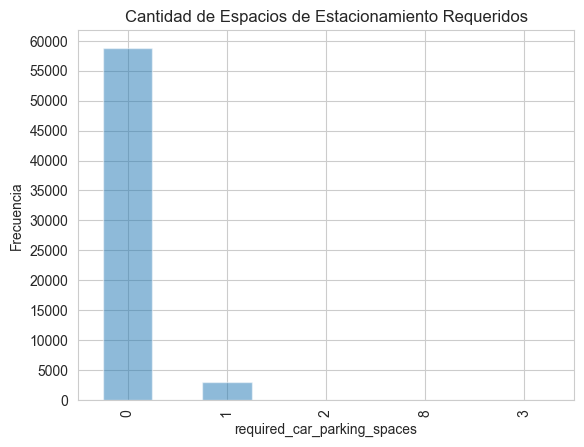

In [593]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ds_trabajo['required_car_parking_spaces'].value_counts().plot.bar(alpha=0.5, ax=ax)
ax.set_title("Cantidad de Espacios de Estacionamiento Requeridos")
ax.set_xlabel("required_car_parking_spaces")
ax.set_ylabel("Frecuencia")
ax.set_yticks(range(0, 61913, 5000))
plt.show()

Concluimos entonces que esta columna no aporta para el análisis por dicho motivo.

In [594]:
ds_trabajo = ds_trabajo.drop('required_car_parking_spaces', axis=1)

Vamos a analizar la correlación de las variables `agent`, `market_segment`, `distribution_channel`. Queremos ver si la nulidad de `agent` tiene relación con el canal de distribución y la segmentación de mercado. Esto es, si se corresponde que los registros con `agent` nulo impliquen que el valor de `market_segment` o el de `distribution_channel` no sea `TA/TO`, que son los posibles valores que ameritan que no sea nulo.

 Primero analizamos esto a partir del heatmap de `agent` contra `market_segment`. Lo que podemos ver en el gráfico es que las categorías de `Online TA` y `Offline TA/TO` concentran los colores más cálidos para cuando `agent` no es nulo.

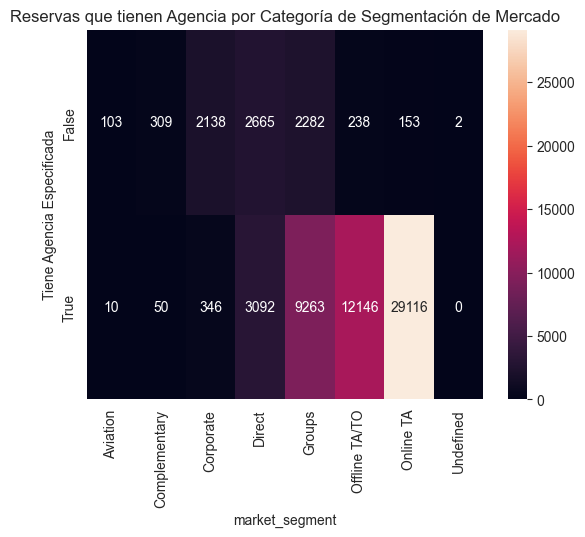

In [595]:
crosstab_agent_segment = pd.crosstab(~ds_trabajo['agent'].isna(), ds_trabajo['market_segment'])
heatmap = sns.heatmap(crosstab_agent_segment,annot=True,fmt='g')
heatmap.set_title("Reservas que tienen Agencia por Categoría de Segmentación de Mercado")
heatmap.set_ylabel("Tiene Agencia Especificada")
plt.show()

Por otro lado, vemos algo similar en el heatmap de `agent` contra `distribution_channel`. Vemos que el color más cálido está si la agencia no es nula y si la categoría es `TA/TO`.

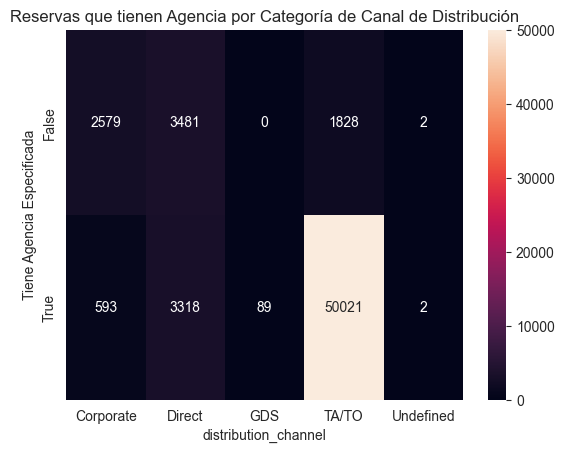

In [596]:
crosstab_agent_distribution = pd.crosstab(~ds_trabajo['agent'].isna(), ds_trabajo['distribution_channel'])
heatmap = sns.heatmap(crosstab_agent_distribution,annot=True,fmt='g')
heatmap.set_title("Reservas que tienen Agencia por Categoría de Canal de Distribución")
heatmap.set_ylabel("Tiene Agencia Especificada")
plt.show()

Podemos concluir entonces que si el canal de distribución o el segmento de mercado está relacionado a una categoría del estilo `TA/TO`, `agent` es no nulo. Además, la columna `agent` tiene una importante cantidad de categorías y creemos que reducirla a un booleano nos facilitará el análisis. Por estos dos motivos, decidimos modificar la columna `agent` para que sea booleana e indique si se especificó `agent` o no. 

In [597]:
# Crear una nueva columna que indique si se especificó un agente o no
ds_trabajo['agent_specified'] = ds_trabajo['agent'].notnull().astype(int).astype(object)

# Eliminar la columna original 'agent'
ds_trabajo.drop(columns=['agent'], inplace=True)

ds_trabajo['agent_specified']


0        1
1        0
2        1
3        1
4        1
        ..
61908    1
61909    0
61910    0
61911    1
61912    1
Name: agent_specified, Length: 61913, dtype: object

Pensamos que dadas las opciones de la columna `meal`, podría ser un factor poco y nada relevante para una posible cancelación. Esto es porque en primer lugar parece que los hoteles ofrecen todas las opciones de comida, según el momento del día. Pero no es suficiente, creemos que hay factores relacionados a la comida que podrían ser más interesantes de conocer, como pueden ser las opciones gastronómicas o el precio de cada categoría. Por este motivo en principio pensamos en descartarla, no sin antes hacer un análisis de la distribución de cada categoría. Para esto vamos a analizar su distribución en un pie plot. 

        meal  frecuencia  percentage
0         BB       47837        77.2
1         HB        7452        12.0
2         SC        5556         9.0
3  Undefined         591         1.0
4         FB         477         0.8


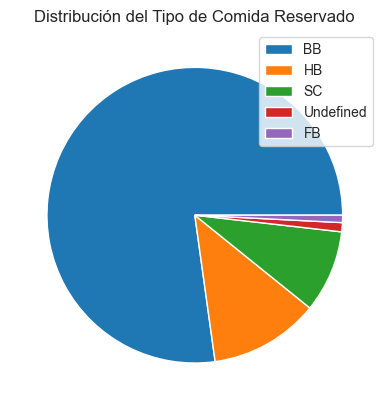

In [598]:
# Calcular la frecuencia de la variable 'meal'
frecuencia = ds_trabajo['meal'].value_counts()

# Crear un nuevo DataFrame con los valores y frecuencias
df_meal = pd.DataFrame({'meal': frecuencia.index, 'frecuencia': frecuencia.values})

# calcular los porcentajes
df_meal['percentage'] = round(df_meal['frecuencia'] / df_meal['frecuencia'].sum() * 100, 1)

# redondear los porcentajes para que sumen 100%
diff = 100 - df_meal['percentage'].sum()
df_meal.loc[0, 'percentage'] += diff

# imprimir el dataframe
print(df_meal)

# crear gráfico de torta
plt.pie(df_meal['percentage'], autopct="")
plt.title("Distribución del Tipo de Comida Reservado")
plt.legend(labels=df_meal['meal'])
plt.show()


Podemos ver claramente que la mayoría de los registros se concentran en la categoría `BB`. Las demás categorías presentan porcentajes muy bajos en comparación.
Ahora nos interesa conocer la distribución de estos valores con respecto al target (`is_canceled`). Para esto vamos a usar un stacked bar plot.

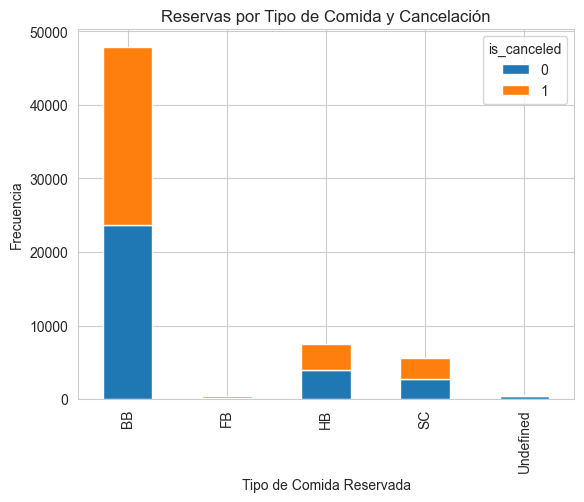

In [599]:
table = pd.crosstab(ds_trabajo['meal'], ds_trabajo['is_canceled'])

stacked_plot = table.plot(kind="bar", stacked=True)

stacked_plot.set_xlabel("Tipo de Comida Reservada")
stacked_plot.set_ylabel("Frecuencia")
stacked_plot.set_title("Reservas por Tipo de Comida y Cancelación")

plt.show()

Observamos en el gráfico que la distribución de cada categoría de `meal` es similar para cada valor de `is_canceled`. Por lo tanto, con todo lo mencionado anteriormente concluímos que la variable `meal` no es relevante para el análisis y será descartada.

In [600]:
ds_trabajo = ds_trabajo.drop('meal', axis=1)

Ahora nos interesa analizar las columnas `adults`, `children` y `babies`. Creemos que existe la posibilidad de combinarlas en una única columna y así tener la cantidad total de pasajeros, en vez de distinguirlas. Con este enfoque, vamos a crear una columna nueva `total_passengers` que tiene la suma de estas tres columnas y vamos a analizar las medidas de resumen y correlaciones entre ellas y observar si la nueva columna tiene una relación similar a nuestra variable objetivo `is_canceled` que las originales individualmente. 

En primer lugar, creamos la columna `total_passengers` y como primer análisis vamos a calcular las medidas de resumen de las cuatro columnas involucradas.

In [601]:
ds_trabajo['total_passengers'] = ds_trabajo['babies'] + ds_trabajo['children'] + ds_trabajo['adults']

print(ds_trabajo[['babies', 'children', 'adults', 'total_passengers']].describe())


             babies      children        adults  total_passengers
count  61913.000000  61913.000000  61913.000000      61913.000000
mean       0.007155      0.104889      1.862791          1.974836
std        0.092158      0.402835      0.589066          0.731700
min        0.000000      0.000000      0.000000          0.000000
25%        0.000000      0.000000      2.000000          2.000000
50%        0.000000      0.000000      2.000000          2.000000
75%        0.000000      0.000000      2.000000          2.000000
max        9.000000     10.000000     55.000000         55.000000


Las medidas de resumen indican que hay una cierta variabilidad en los datos de las diferentes columnas, vemos que las variables 'adults', 'children' y 'babies', no tienen distribuciones uniformes y que las medias están cercanas entre sí. Por otro lado, vemos que las estadísticas de `total_passengers` son similares a la suma de las tres columnas.

Además, la creación de la variable 'total_passengers' también nos permite tener una variable numérica que representa de manera más sencilla la cantidad total de pasajeros en una reserva, lo que podría ser útil para el análisis y la modelización posterior.

Por otro lado, observamos que la distribución de `babies`, `children`, `adults` y `total_passengers` son similares entre sí.

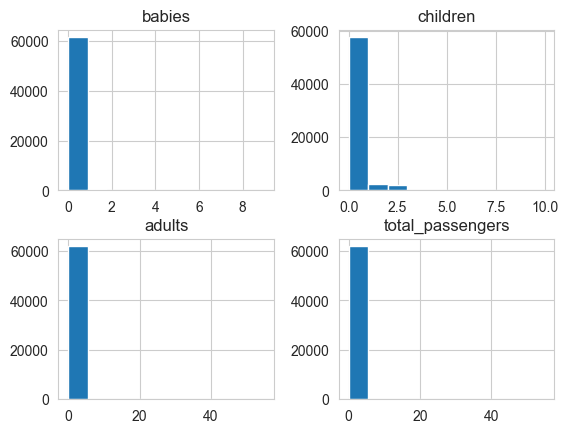

In [602]:
ds_trabajo[['babies', 'children', 'adults', 'total_passengers']].hist(bins=10)
plt.show()

Por último vamos a analizar la frecuencia de cada una de estas cuatro columnas por separado contra la variable target `is_canceled`, a través de un bar plot. 

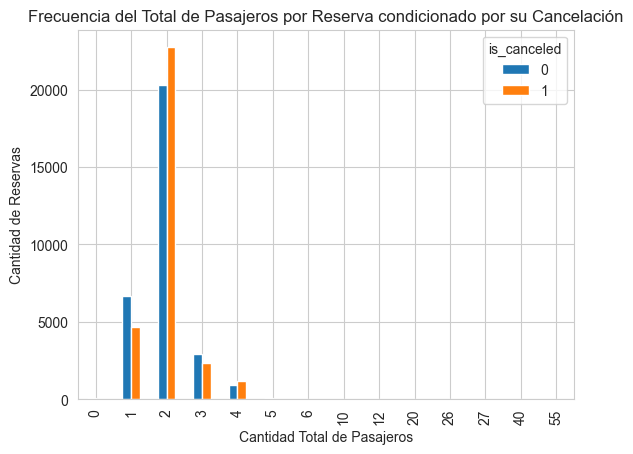

In [603]:
total_passengers_cancelled = ds_trabajo.groupby(['total_passengers', 'is_canceled']).size().unstack()

total_passengers_cancelled.plot.bar()
plt.title('Frecuencia del Total de Pasajeros por Reserva condicionado por su Cancelación')
plt.xlabel('Cantidad Total de Pasajeros')
plt.ylabel('Cantidad de Reservas')
plt.show()

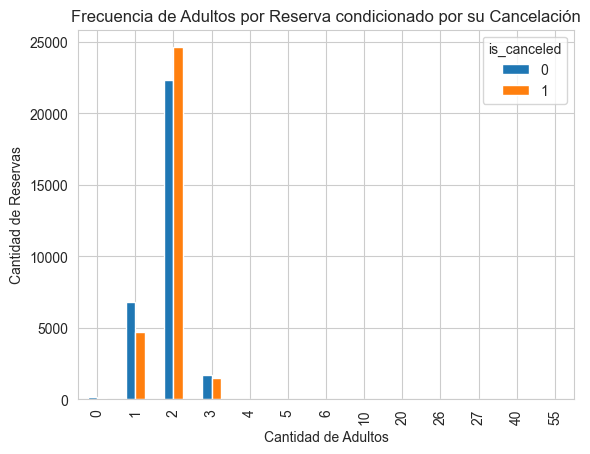

In [604]:
adults_cancelled = ds_trabajo.groupby(['adults', 'is_canceled']).size().unstack()

adults_cancelled.plot.bar()
plt.title('Frecuencia de Adultos por Reserva condicionado por su Cancelación')
plt.xlabel('Cantidad de Adultos')
plt.ylabel('Cantidad de Reservas')
plt.show()

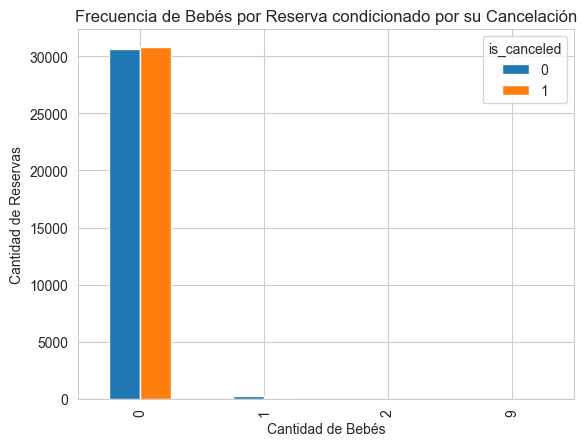

In [605]:
babies_cancelled = ds_trabajo.groupby(['babies', 'is_canceled']).size().unstack()

babies_cancelled.plot.bar()
plt.title('Frecuencia de Bebés por Reserva condicionado por su Cancelación')
plt.xlabel('Cantidad de Bebés')
plt.ylabel('Cantidad de Reservas')
plt.show()

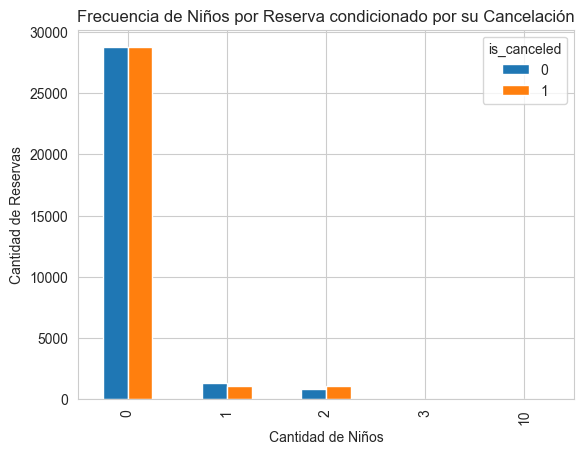

In [606]:
children_cancelled = ds_trabajo.groupby(['children', 'is_canceled']).size().unstack()

children_cancelled.plot.bar()
plt.title('Frecuencia de Niños por Reserva condicionado por su Cancelación')
plt.xlabel('Cantidad de Niños')
plt.ylabel('Cantidad de Reservas')
plt.show()

Podemos ver que tanto `total_passengers` como `adults` tienen una distribución muy similar con respecto a la variable `is_canceled`. Por otro lado, `babies` y `children` contra `is_canceled` también son similares, y adicionalmente notamos en estos gráficos que existen más reservas sin bebés ni niños, lo cual refuerza el hecho de que los gráficos de la cantidad de adultos y la cantidad total de pasajeros sean parecidos.

Por estos motivos, vamos a unificar las columnas `adults`, `children` y `babies` en una única columna `total_passengers`. Eliminamos las tres columnas en cuestión.

In [607]:
ds_trabajo = ds_trabajo.drop('adults', axis=1)
ds_trabajo = ds_trabajo.drop('children', axis=1)
ds_trabajo = ds_trabajo.drop('babies', axis=1)


In [608]:
ds_trabajo.columns.to_list()

['hotel',
 'lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'total_of_special_requests',
 'reservation_status_date',
 'is_canceled',
 'arrival_date',
 'agent_specified',
 'total_passengers']

El siguiente punto es analizar gráficamente la distribución de nuestras variables y también la relación de cada una con el target `is_canceled`.

Para `hotel`, vemos en un gráfico de torta que hay un mayor porcentaje de reservas para la categoría `City Hotel` que para `Resort Hotel`.

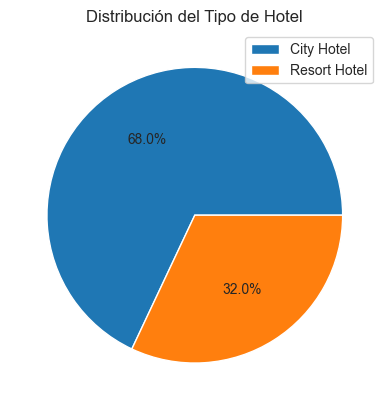

In [609]:
frecuencia = ds_trabajo['hotel'].value_counts()

df_hotel = pd.DataFrame({'hotel': frecuencia.index, 'frecuencia': frecuencia.values})

df_hotel['percentage'] = round(df_hotel['frecuencia'] / df_hotel['frecuencia'].sum() * 100, 1)

diff = 100 - df_hotel['percentage'].sum()
df_hotel.loc[0, 'percentage'] += diff

plt.pie(df_hotel['percentage'], autopct="%1.1f%%")
plt.title("Distribución del Tipo de Hotel")
plt.legend(labels=df_hotel['hotel'])
plt.show()

Por otro lado, observamos en un barplot que se cancelan más reservas para `City Hotel` que para `Resort Hotel`. 

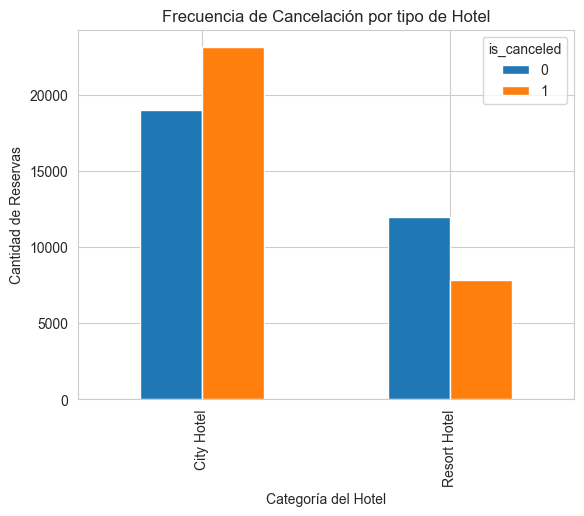

In [610]:
hotels_cancelled = ds_trabajo.groupby(['hotel', 'is_canceled']).size().unstack()

hotels_cancelled.plot.bar()
plt.title('Frecuencia de Cancelación por tipo de Hotel')
plt.xlabel('Categoría del Hotel')
plt.ylabel('Cantidad de Reservas')
plt.show()

Para la variable `lead_time`, elegimos analizar su boxplot.
Viendo su rango intercuartílico, sabemos que la mayoría de las reservas se hacen con entre 1 y 6 meses de antelación. Por otro lado, vemos que el mínimo está en 0 meses y el máximo cerca de los 14 meses. Por último, vemos que hay varios outliers entre el máximo de meses y los 21 meses.

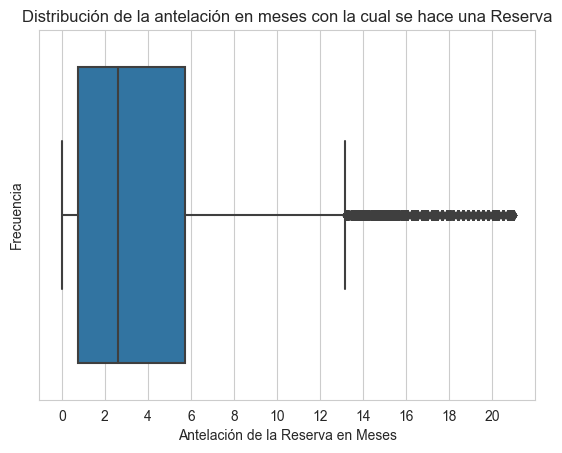

In [611]:
sns.boxplot(x=ds_trabajo["lead_time"])
plt.xticks(range(0, 22, 2))
plt.xlabel('Antelación de la Reserva en Meses')
plt.ylabel('Frecuencia')
plt.title('Distribución de la antelación en meses con la cual se hace una Reserva')
plt.show()


Analizamos su relación con `is_canceled` mediante un scatter plot. Podemos observar claramente que entre mayor sea la antelación con la cual se hizo la reserva, mayor es su probabilidad de cancelación. A partir de los 10 meses aproximadamente se ven muchas más cancelaciones.

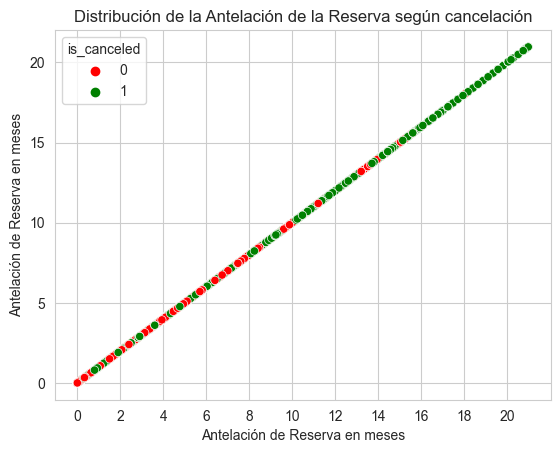

In [612]:
ds_trabajo["lead_time_meses"] = ds_trabajo["lead_time"]

sns.scatterplot(data=ds_trabajo, x="lead_time_meses", y="lead_time_meses", hue="is_canceled", palette=["red", "green"])

plt.xticks(range(0, 22, 2))
plt.title("Distribución de la Antelación de la Reserva según cancelación")
plt.xlabel("Antelación de Reserva en meses")
plt.ylabel("Antelación de Reserva en meses")
plt.show()

En cuanto a la columna ´stays_in_weekend_nights´, observamos que mayoritariamente no se reservan noches de fin de semana. Luego el resto de los valores se concentra entre 2 y 1 noche de fin de semana, mientras que para los demás valores son pocas las reservas registradas.

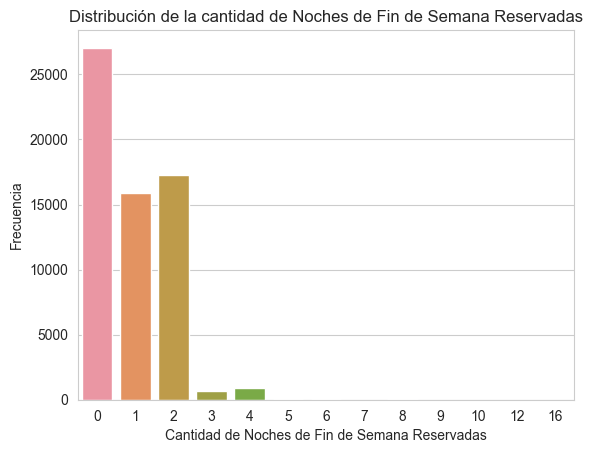

In [613]:
grafico = sns.countplot(x='stays_in_weekend_nights', data=ds_trabajo)

grafico.yaxis.set_major_locator(plt.MultipleLocator(5000))

plt.xlabel('Cantidad de Noches de Fin de Semana Reservadas')
plt.ylabel('Frecuencia')
plt.title('Distribución de la cantidad de Noches de Fin de Semana Reservadas')
plt.show()

Viendo el bar plot de `stays_in_weekend_nights` contra `is_canceled`, esta variable no parece tener un impacto significativo en la cancelación de una reserva. Esto es porque vemos un peso similar para cancelados y no cancelados en sus valores posibles, en un primer análisis no vemos una relación clara entre estas dos variables. 

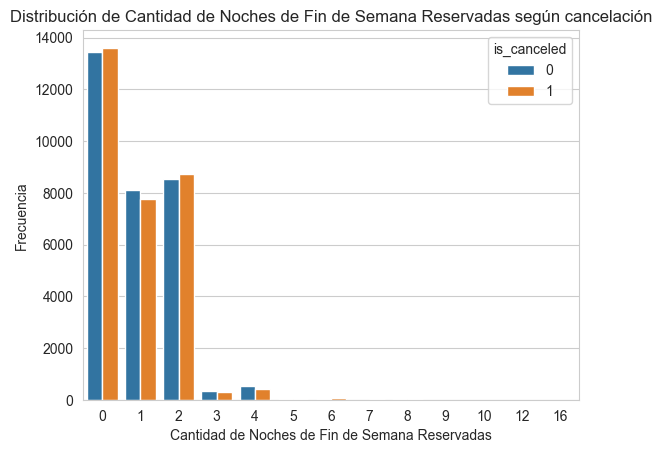

In [614]:
grafico = sns.countplot(x='stays_in_weekend_nights', hue='is_canceled', data=ds_trabajo)

plt.xlabel('Cantidad de Noches de Fin de Semana Reservadas')
plt.ylabel('Frecuencia')
plt.title("Distribución de Cantidad de Noches de Fin de Semana Reservadas según cancelación")

plt.show()

Análogamente hacemos el análisis para `stays_in_week_nights`. Observamos que se reservan en su mayoría 2 noches de semana, seguido de 1 y de 3. PENDING

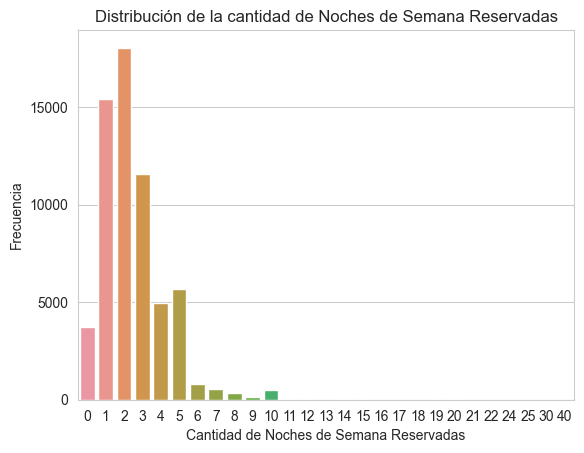

In [615]:
grafico = sns.countplot(x='stays_in_week_nights', data=ds_trabajo)

grafico.yaxis.set_major_locator(plt.MultipleLocator(5000))

plt.xlabel('Cantidad de Noches de Semana Reservadas')
plt.ylabel('Frecuencia')
plt.title('Distribución de la cantidad de Noches de Semana Reservadas')
plt.show()

Comparándolo contra nuestro target, esta vez sí notamos que hay diferencias entre cancelados y no cancelados según el valor que puede tomar la variable, principalmente para 1 y 2 días.

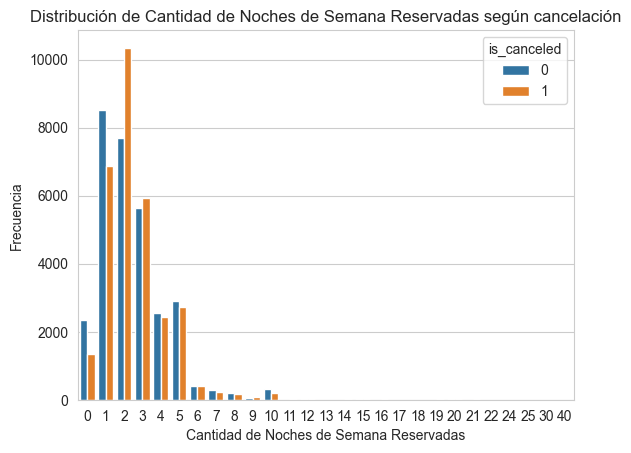

In [616]:
grafico = sns.countplot(x='stays_in_week_nights', hue='is_canceled', data=ds_trabajo)

plt.xlabel('Cantidad de Noches de Semana Reservadas')
plt.ylabel('Frecuencia')
plt.title("Distribución de Cantidad de Noches de Semana Reservadas según cancelación")

plt.show()

Para el análisis de `days_in_waiting_list`, notamos que hay una gran concentración de datos en 0 días.

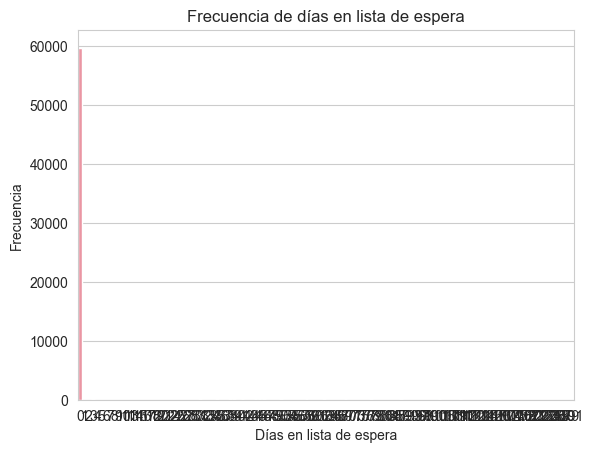

In [617]:
import seaborn as sns

sns.countplot(x='days_in_waiting_list', data=ds_trabajo)

plt.xlabel('Días en lista de espera')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de días en lista de espera')

plt.show()


Vamos a analizar por separado aquellos registros que tengan más de 0 días en lista de espera.

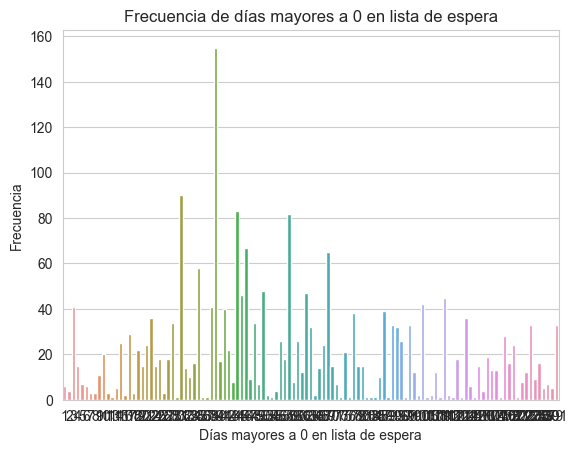

In [618]:
import seaborn as sns

days_greater_zero = ds_trabajo[ds_trabajo['days_in_waiting_list'] > 0]

sns.countplot(x='days_in_waiting_list', data=days_greater_zero)

plt.xlabel('Días mayores a 0 en lista de espera')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de días mayores a 0 en lista de espera')

plt.show()


Como todavía es ilegible, vamos a pasar estos registros con más de 0 días de espera a quincenas.

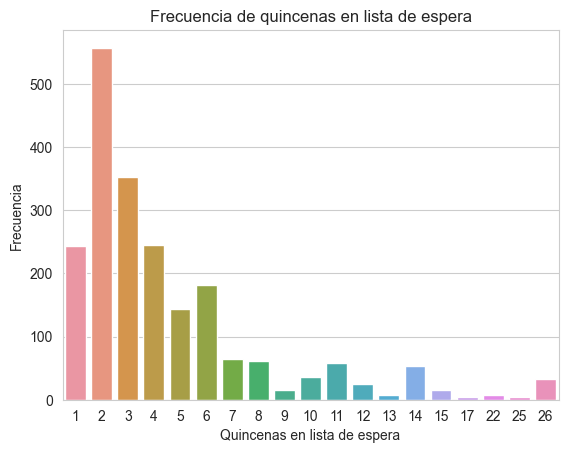

In [619]:
import seaborn as sns

ds_trabajo['fortnights_in_waiting_list'] = ds_trabajo['days_in_waiting_list'] // 15

fortnights_in_waiting_list = ds_trabajo.loc[ds_trabajo['fortnights_in_waiting_list'] > 0]

sns.set_style('whitegrid')

sns.countplot(x='fortnights_in_waiting_list', data=fortnights_in_waiting_list)

plt.xlabel('Quincenas en lista de espera')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de quincenas en lista de espera')

# Mostrar el gráfico
plt.show()


Ahora sí notamos que hay una mayor concentración de datos en la segunda quincena. Ahora vamos a analizar esta variable contra `is_canceled`, tanto en el caso de 0 días como de más de 0 días agrupados en quincenas. 

Para el caso de 0 días en lista de espera, vemos que no hay gran diferencia entre cancelados y no cancelados, por lo que no parece tener un impacto significativo en el análisis del target.

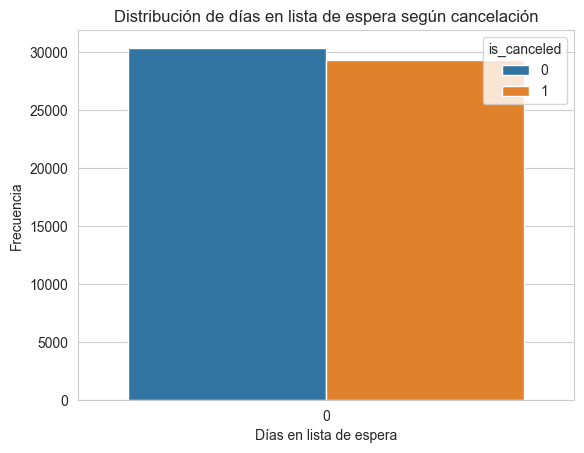

In [620]:
sns.set_style('whitegrid')
zero_days = ds_trabajo[ds_trabajo['days_in_waiting_list'] == 0]
sns.countplot(x='days_in_waiting_list', hue="is_canceled",data=zero_days)

plt.xlabel('Días en lista de espera')
plt.ylabel('Frecuencia')
plt.title('Distribución de días en lista de espera según cancelación')

plt.show()

Ahora bien, cuando lo analizamos para las quincenas de registros mayores a 0 días en lista de espera, notamos que sí hay distintos pesos para cancelado o no cancelado según la quincena.

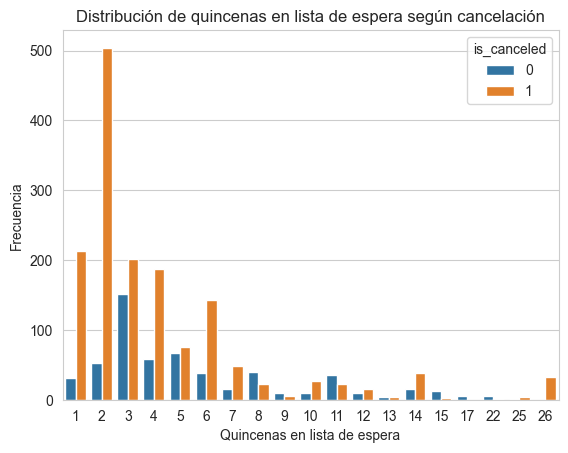

In [621]:
fortnights_in_waiting_list = ds_trabajo.loc[ds_trabajo['fortnights_in_waiting_list'] > 0]

sns.set_style('whitegrid')

sns.countplot(x='fortnights_in_waiting_list', hue="is_canceled",data=fortnights_in_waiting_list)

plt.xlabel('Quincenas en lista de espera')
plt.ylabel('Frecuencia')
plt.title('Distribución de quincenas en lista de espera según cancelación')

plt.show()

PREGUNTARLE A LA PROFE: Con unidad de dias, es muy dificil de analizar dado que son muchos los valores posibles. Se nos ocurrio entonces pasar a quincenas aquellos registros que tengan dias mayores a 0 y observar aca su relacion con is_canceled. En principio, para los registros que tienen 0 días no vemos que tenga impacto significativo contra el target porque la cantidad de cancelados y no cancelados es muy similar. En cambio para las reservas de más de 0 días, agrpadas por quincena, si vemos diferencias entre los valores, de hecho vemos que en la segunda quincena se cancela mucho. El tema es que al ser tan pocos registros (alrededor de 400 mayores a 0 de los 60000 disponibles) no sabemos si pretarles atencion, tampoco sabemos si al reducir la granularidad de días a quincenas estamos o no perdiendo información...